# Exploration 2

#### List of (more immediate) business questions:

* Q1. What are the top categories of products?
* Q2. For each category of product, what are the sub categories? E.g., Security software is a sub category of Software
* Q3. In each product category, what are all the brands ?
* Q4. How is rating stats (total reviews, average star rating, std deviations) for a given product, sub cat, brand
* Q5. How do these ratings change over time ?
* Q6. What are the span of dates reviews are submitted? Date range.
* Q7. Can we create an automatic rating system ? In: Comments/reviews in text -> Out: star rating: 1 to 5


In [228]:
# Answer to *** Q1 ***
product_categories=["Apparel", "Automotive", "Baby","Beauty","Books","Camera","Ebook","Music","Software",
"Digital_Video","Digital_Video_Games","Electronics","Furniture","Gift_Card","Grocery","Health_Personal_Care",
"Home_Entertainment","Home_Improvement","Home","Jewelry","Kitchen","Lawn_and_Garden","Luggage",
"Major_Appliances","Mobile_Apps","Mobile_Electronics","Music","Musical_Instruments","Office_Products","Outdoors","PC",
"Personal_Care_Appliances","Pet_Products","Shoes", "Software","Sports","Tools","Toys","Video_DVD","Video_Games",
"Video", "Watches", "Wireless"]

In [229]:
# This is to prepare environment and import libraries
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import os
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import PunktSentenceTokenizer
import random

In [230]:
raw_reviews=pd.read_csv('data/raw/amazon_reviews_us_Software_v1_00.tsv',delimiter='\t', encoding='utf-8')

In [231]:
categorical=raw_reviews.dtypes[raw_reviews.dtypes=="object"].index
raw_reviews[categorical].describe()

,marketplace,review_id,product_id,product_title,product_category,vine,verified_purchase,review_headline,review_body,review_date
count,341931,341931,341931,341931,341931,341931,341931,341928,341916,341898
unique,1,341931,28736,27760,1,2,2,240603,330646,5775
top,US,R2WJXZI7WXSK4I,B000HCZ8EO,Microsoft Office Home and Student 2007 [Old Ve...,Software,N,Y,Five Stars,good,2007-01-09
freq,341931,1,2521,2521,341931,331516,195647,18785,360,383


In [232]:
# Related to *** Q6 ***
#   For Software, the earliest is 1998-09-21, the last reviews were on 2015-08-31
raw_reviews["review_date"].sort_values().unique()

array(['1998-09-21', '1998-12-04', '1998-12-23', ..., '2015-08-30',
       '2015-08-31', nan], dtype=object)

In [233]:
# To simplify the investigation, dropping the unused (for now) fields
raw_reviews=raw_reviews.drop(['marketplace','review_id','product_parent','helpful_votes','total_votes','vine','verified_purchase'], axis=1)

In [250]:
# Add sentiment column to the dataframe based on star_rating 
raw_reviews['sentiment'] = raw_reviews.star_rating.map({1:'Negative', 2:'Negative', 3:'Neutral', 4:'Positive', 5:'Positive'})

In [253]:
categorical=raw_reviews.dtypes[raw_reviews.dtypes=="object"].index
raw_reviews[categorical].describe()

,product_id,product_title,product_category,review_headline,review_body,review_date,sentiment
count,341931,341931,341931,341928,341916,341898,341931
unique,28736,27760,1,240603,330646,5775,3
top,B000HCZ8EO,Microsoft Office Home and Student 2007 [Old Ve...,Software,Five Stars,good,2007-01-09,Positive
freq,2521,2521,341931,18785,360,383,212596


In [10]:
# testtext=raw_reviews.sort_values(by=['product_id','review_date'])['review_body'][0]

In [254]:
stop_words = set(stopwords.words("english"))

In [12]:
# tokenized=word_tokenize(testtext)

In [255]:
# Name Entity Recognition, in order to extract brand names and product names 
def process_content2():
    try:
        for s in raw_reviews['product_title'][:1]:
            words = nltk.word_tokenize(s)
            filtered = [w for w in words if not w in stop_words]
            tagged = nltk.pos_tag(filtered)
            print(tagged)
            #namedEnt = nltk.ne_chunk(tagged, binary=False) # Binary=True to remove categorization of the entity
            #print(namedEnt)
            #namedEnt.draw()
    except Exception as e:
        print(str(e))

In [256]:
process_content2()

[('McAfee', 'NN'), ('2015', 'CD'), ('Internet', 'NNP'), ('Security', 'NNP'), ('3', 'CD'), ('PC', 'NN'), ('(', '('), ('3-Users', 'NNS'), (')', ')')]


In [257]:
sample = ','.join(raw_reviews['product_title'])

In [258]:
# entity_names and its dependencies below are codes found on the Internet
sentences = nltk.sent_tokenize(sample)
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
chunked_sentences = nltk.ne_chunk_sents(tagged_sentences, binary=True)  # A Python generator

In [259]:
def extract_entity_names(t):
    entity_names = []
    
    if hasattr(t, 'label') and t.label:
        if t.label() == 'NE':
            entity_names.append(' '.join([child[0] for child in t]))
        else:
            for child in t:
                entity_names.extend(extract_entity_names(child))
                
    return entity_names

In [260]:
entity_names = []
for tree in chunked_sentences:
    entity_names.extend(extract_entity_names(tree))

In [261]:
# Related to Q3 , these captures brand and product names
# TODOTODO: further clean out name entities, also separate the list to brands, product type(subcategory), model name etc
entity_names_set=set(entity_names)

In [262]:
len(entity_names_set)

19533

In [263]:
from wordcloud import WordCloud, STOPWORDS
big_string = ','.join(entity_names)
wc = WordCloud().generate(big_string)

(-0.5, 399.5, 199.5, -0.5)

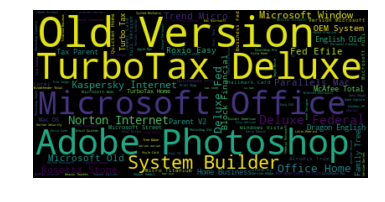

In [264]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

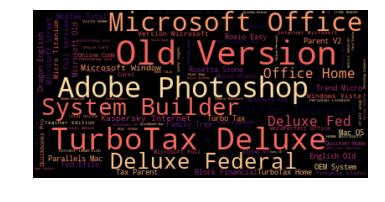

In [265]:
wc = WordCloud(max_font_size=40, colormap='magma').generate(big_string)
plt.figure()
# plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [266]:
from nltk.classify import SklearnClassifier
from sklearn.model_selection import train_test_split
from subprocess import check_output

In [267]:
train, test = train_test_split(raw_reviews, test_size = 0.2)
train = train[train.star_rating != 3]  # Avoid neutral sentiment ,i.e., out of the 5 stars, 1,2 negative, 4,5 positive
print("Training size: ", len(train))
print("Testing size : ", len(test))

Training size:  248951
Testing size :  68387


In [268]:
train_pos = train[ train['star_rating'] > 3]
train_pos_product_title = train_pos['product_title']
train_pos_review_headline = train_pos['review_headline']
train_pos_review_body = train_pos['review_body']
train_neg = train[ train['star_rating'] < 3]
train_neg_product_title = train_neg['product_title']
train_neg_review_headline = train_neg['review_headline']
train_neg_review_body = train_neg['review_body']

# TODOTODO: Next is to filter for and only use Named entity, for brand and product sentiments


In [269]:
# Word cloud generate and draw
def wordcloud_draw(word_list, color = 'black'):
    words = ','.join(str(item) for item in word_list)
    cleaned_word = words
    '''
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                                ])
    '''
    exclude_these = list(STOPWORDS) 
    exclude_these.extend(['br']) # Temporary fix, should really clean the data to start with
    wordcloud = WordCloud(stopwords=exclude_these,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


In [271]:
print("POSITIVE Product Title")
wordcloud_draw(train_pos_product_title, 'white')

POSITIVE Product Title


In [225]:
print("POSITIVE Review Headline")
wordcloud_draw(train_pos_review_headline, 'white')

POSITIVE Review Headline


In [222]:
print("POSITIVE Review Body")
wordcloud_draw(train_pos_review_body, 'white')

POSITIVE Review Body


In [221]:
print("NEGATIVE Product Title")
wordcloud_draw(train_neg_product_title)

NEGATIVE Product Title


In [220]:
print("NEGATIVE Review Headline")
wordcloud_draw(train_neg_review_headline)

NEGATIVE Review Headline


In [219]:
print("NEGATIVE Review Body")
wordcloud_draw(train_neg_review_body)

NEGATIVE Review Body


In [287]:
stopwords_set = set(stopwords.words("english"))

In [288]:
train['exp'] = train['review_headline'].astype(str).str.split()

In [289]:
reviews = []
for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.exp if len(e) >= 3]
    '''
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    '''
    words_cleaned = words_filtered
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    reviews.append((words_without_stopwords,row.sentiment))

In [292]:
test_pos = test[ test['sentiment'] == 'Positive']
test_pos_product_title = test_pos['product_title']
test_pos_review_headline = test_pos['review_headline']
test_pos_review_body = test_pos['review_body']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg_product_title = test_neg['product_title']
test_neg_review_headline = test_neg['review_headline']
test_neg_review_body = test_neg['review_body']

In [296]:
# Extracting word features
def get_words_in_reviews(reviews):
    all = []
    for (words, sentiment) in reviews:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features

# As dictionary keys 
w_features = get_word_features(get_words_in_reviews(reviews))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features

In [298]:
# wordcloud_draw(w_features)

In [ ]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,reviews)
classifier = nltk.NaiveBayesClassifier.train(training_set)